In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
agartala_meteo = pd.read_csv('/kaggle/input/tripura-aqi/Tripura/Metrological Data/Agartala.csv', delimiter=',')
agartala_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,15.1,98,0.0,1014.0,5.8,9.2,270,312
1,2024-01-01T01:00,14.7,100,0.0,1015.2,6.1,9.8,310,324
2,2024-01-01T02:00,16.9,95,0.0,1015.9,4.1,9.3,315,324
3,2024-01-01T03:00,18.8,88,0.0,1016.6,4.2,6.3,329,329
4,2024-01-01T04:00,20.9,81,0.0,1016.4,4.4,6.2,325,324
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.5,94,0.0,1013.8,5.8,17.0,304,311
8780,2024-12-31T20:00,14.9,96,0.0,1013.1,5.3,15.6,298,307
8781,2024-12-31T21:00,14.8,96,0.0,1012.5,5.9,17.0,308,311
8782,2024-12-31T22:00,14.3,96,0.0,1012.1,5.4,15.1,307,315


In [3]:
agartala_meteo['time'] = pd.to_datetime(agartala_meteo['time'])
agartala_meteo.set_index('time', inplace=True)
agartala_meteo = agartala_meteo.resample('D').mean().reset_index()
agartala_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01,18.650000,84.458333,0.0,1013.683333,6.087500,10.933333,312.291667,321.500000
1,2024-01-02,17.962500,85.708333,0.0,1013.670833,6.112500,11.091667,325.416667,329.541667
2,2024-01-03,17.404167,87.375000,0.0,1013.295833,6.554167,9.966667,227.500000,224.041667
3,2024-01-04,17.966667,82.833333,0.0,1013.795833,4.804167,7.208333,201.625000,287.125000
4,2024-01-05,17.454167,86.208333,0.0,1014.533333,6.358333,9.683333,138.958333,218.875000
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,19.262500,71.958333,0.0,1015.741667,3.820833,9.383333,262.000000,311.541667
362,2024-12-28,19.520833,76.541667,0.0,1014.304167,3.916667,8.862500,179.208333,208.041667
363,2024-12-29,19.854167,72.333333,0.0,1013.937500,3.837500,7.079167,207.333333,238.958333
364,2024-12-30,20.362500,72.875000,0.0,1014.820833,5.212500,11.916667,270.250000,259.708333


In [4]:
agartala_pollutants = pd.read_csv('/kaggle/input/tripura-aqi/Tripura/Pollutants/Agartala.csv', delimiter= ',')
agartala_pollutants['Timestamp'] = agartala_meteo['time']
agartala_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
agartala_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01,124.47,252.82,12.97,12.56,27.70,8.62,16.15,1.42,0.83,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,11.66,NaN,NaN
1,2024-01-02,104.85,186.22,4.49,11.60,15.77,8.96,16.17,1.16,0.90,...,NaN,NaN,74.39,0.72,300.84,0.0,0.0,10.61,750.0,NaN
2,2024-01-03,78.47,116.61,8.51,9.02,18.83,9.04,16.64,0.85,1.08,...,NaN,NaN,73.60,1.08,290.52,0.0,0.0,3.00,750.0,NaN
3,2024-01-04,93.96,211.57,16.55,9.42,29.71,9.31,18.21,1.25,0.55,...,NaN,NaN,91.78,0.47,142.63,0.0,0.0,6.42,750.0,NaN
4,2024-01-05,71.47,125.51,12.17,10.12,24.55,7.97,18.20,0.91,0.45,...,NaN,NaN,88.68,0.63,167.25,0.0,0.0,22.94,750.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,97.14,159.06,14.64,15.19,32.12,20.64,15.03,1.14,30.44,...,0.68,NaN,85.58,0.41,234.73,0.0,0.0,16.56,750.0,NaN
362,2024-12-28,102.50,171.21,14.77,15.87,32.86,20.16,15.87,1.02,32.74,...,0.61,NaN,57.38,0.76,312.91,0.0,0.0,0.85,750.0,NaN
363,2024-12-29,108.96,176.30,10.07,20.36,30.55,21.33,18.73,1.11,26.82,...,0.67,NaN,83.54,0.24,236.81,0.0,0.0,0.07,750.0,NaN
364,2024-12-30,104.50,170.33,10.71,18.46,29.77,20.72,16.64,1.08,35.10,...,0.65,NaN,82.92,0.45,224.26,0.0,0.0,18.30,750.0,NaN


In [5]:
agartala = pd.merge(agartala_meteo.iloc[:, :], agartala_pollutants.iloc[:, 0:3], on='time')
agartala

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01,18.650000,84.458333,0.0,1013.683333,6.087500,10.933333,312.291667,321.500000,124.47,252.82
1,2024-01-02,17.962500,85.708333,0.0,1013.670833,6.112500,11.091667,325.416667,329.541667,104.85,186.22
2,2024-01-03,17.404167,87.375000,0.0,1013.295833,6.554167,9.966667,227.500000,224.041667,78.47,116.61
3,2024-01-04,17.966667,82.833333,0.0,1013.795833,4.804167,7.208333,201.625000,287.125000,93.96,211.57
4,2024-01-05,17.454167,86.208333,0.0,1014.533333,6.358333,9.683333,138.958333,218.875000,71.47,125.51
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,19.262500,71.958333,0.0,1015.741667,3.820833,9.383333,262.000000,311.541667,97.14,159.06
362,2024-12-28,19.520833,76.541667,0.0,1014.304167,3.916667,8.862500,179.208333,208.041667,102.50,171.21
363,2024-12-29,19.854167,72.333333,0.0,1013.937500,3.837500,7.079167,207.333333,238.958333,108.96,176.30
364,2024-12-30,20.362500,72.875000,0.0,1014.820833,5.212500,11.916667,270.250000,259.708333,104.50,170.33


In [6]:
agartala['city'] = 'Agartala'
agartala

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01,18.650000,84.458333,0.0,1013.683333,6.087500,10.933333,312.291667,321.500000,124.47,252.82,Agartala
1,2024-01-02,17.962500,85.708333,0.0,1013.670833,6.112500,11.091667,325.416667,329.541667,104.85,186.22,Agartala
2,2024-01-03,17.404167,87.375000,0.0,1013.295833,6.554167,9.966667,227.500000,224.041667,78.47,116.61,Agartala
3,2024-01-04,17.966667,82.833333,0.0,1013.795833,4.804167,7.208333,201.625000,287.125000,93.96,211.57,Agartala
4,2024-01-05,17.454167,86.208333,0.0,1014.533333,6.358333,9.683333,138.958333,218.875000,71.47,125.51,Agartala
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,19.262500,71.958333,0.0,1015.741667,3.820833,9.383333,262.000000,311.541667,97.14,159.06,Agartala
362,2024-12-28,19.520833,76.541667,0.0,1014.304167,3.916667,8.862500,179.208333,208.041667,102.50,171.21,Agartala
363,2024-12-29,19.854167,72.333333,0.0,1013.937500,3.837500,7.079167,207.333333,238.958333,108.96,176.30,Agartala
364,2024-12-30,20.362500,72.875000,0.0,1014.820833,5.212500,11.916667,270.250000,259.708333,104.50,170.33,Agartala


In [7]:
agartala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      366 non-null    datetime64[ns]
 1   temperature_2m (°C)       366 non-null    float64       
 2   relative_humidity_2m (%)  366 non-null    float64       
 3   rain (mm)                 366 non-null    float64       
 4   surface_pressure (hPa)    366 non-null    float64       
 5   wind_speed_10m (km/h)     366 non-null    float64       
 6   wind_speed_100m (km/h)    366 non-null    float64       
 7   wind_direction_10m (°)    366 non-null    float64       
 8   wind_direction_100m (°)   366 non-null    float64       
 9   PM2.5 (µg/m³)             356 non-null    float64       
 10  PM10 (µg/m³)              350 non-null    float64       
 11  city                      366 non-null    object        
dtypes: datetime64[ns](1), 

In [8]:
agartala = agartala.interpolate()
agartala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      366 non-null    datetime64[ns]
 1   temperature_2m (°C)       366 non-null    float64       
 2   relative_humidity_2m (%)  366 non-null    float64       
 3   rain (mm)                 366 non-null    float64       
 4   surface_pressure (hPa)    366 non-null    float64       
 5   wind_speed_10m (km/h)     366 non-null    float64       
 6   wind_speed_100m (km/h)    366 non-null    float64       
 7   wind_direction_10m (°)    366 non-null    float64       
 8   wind_direction_100m (°)   366 non-null    float64       
 9   PM2.5 (µg/m³)             366 non-null    float64       
 10  PM10 (µg/m³)              366 non-null    float64       
 11  city                      366 non-null    object        
dtypes: datetime64[ns](1), 

In [9]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    agartala[delay1_col] = agartala[col].shift(1)
    delay2_col = col + "_delay2"
    agartala[delay2_col] = agartala[col].shift(2)
    agartala.loc[0, delay1_col] = agartala[col].iloc[-1]
    agartala.loc[1, delay2_col] = agartala[col].iloc[-1]
    agartala.loc[0, delay2_col] = agartala[col].iloc[-2]

agartala

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01,18.650000,84.458333,0.0,1013.683333,6.087500,10.933333,312.291667,321.500000,124.47,252.82,Agartala,103.82,104.50,182.53,170.33
1,2024-01-02,17.962500,85.708333,0.0,1013.670833,6.112500,11.091667,325.416667,329.541667,104.85,186.22,Agartala,124.47,103.82,252.82,182.53
2,2024-01-03,17.404167,87.375000,0.0,1013.295833,6.554167,9.966667,227.500000,224.041667,78.47,116.61,Agartala,104.85,124.47,186.22,252.82
3,2024-01-04,17.966667,82.833333,0.0,1013.795833,4.804167,7.208333,201.625000,287.125000,93.96,211.57,Agartala,78.47,104.85,116.61,186.22
4,2024-01-05,17.454167,86.208333,0.0,1014.533333,6.358333,9.683333,138.958333,218.875000,71.47,125.51,Agartala,93.96,78.47,211.57,116.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,19.262500,71.958333,0.0,1015.741667,3.820833,9.383333,262.000000,311.541667,97.14,159.06,Agartala,104.06,100.87,166.84,157.58
362,2024-12-28,19.520833,76.541667,0.0,1014.304167,3.916667,8.862500,179.208333,208.041667,102.50,171.21,Agartala,97.14,104.06,159.06,166.84
363,2024-12-29,19.854167,72.333333,0.0,1013.937500,3.837500,7.079167,207.333333,238.958333,108.96,176.30,Agartala,102.50,97.14,171.21,159.06
364,2024-12-30,20.362500,72.875000,0.0,1014.820833,5.212500,11.916667,270.250000,259.708333,104.50,170.33,Agartala,108.96,102.50,176.30,171.21


In [10]:
tripura_data = agartala
tripura_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01,18.650000,84.458333,0.0,1013.683333,6.087500,10.933333,312.291667,321.500000,124.47,252.82,Agartala,103.82,104.50,182.53,170.33
1,2024-01-02,17.962500,85.708333,0.0,1013.670833,6.112500,11.091667,325.416667,329.541667,104.85,186.22,Agartala,124.47,103.82,252.82,182.53
2,2024-01-03,17.404167,87.375000,0.0,1013.295833,6.554167,9.966667,227.500000,224.041667,78.47,116.61,Agartala,104.85,124.47,186.22,252.82
3,2024-01-04,17.966667,82.833333,0.0,1013.795833,4.804167,7.208333,201.625000,287.125000,93.96,211.57,Agartala,78.47,104.85,116.61,186.22
4,2024-01-05,17.454167,86.208333,0.0,1014.533333,6.358333,9.683333,138.958333,218.875000,71.47,125.51,Agartala,93.96,78.47,211.57,116.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,19.262500,71.958333,0.0,1015.741667,3.820833,9.383333,262.000000,311.541667,97.14,159.06,Agartala,104.06,100.87,166.84,157.58
362,2024-12-28,19.520833,76.541667,0.0,1014.304167,3.916667,8.862500,179.208333,208.041667,102.50,171.21,Agartala,97.14,104.06,159.06,166.84
363,2024-12-29,19.854167,72.333333,0.0,1013.937500,3.837500,7.079167,207.333333,238.958333,108.96,176.30,Agartala,102.50,97.14,171.21,159.06
364,2024-12-30,20.362500,72.875000,0.0,1014.820833,5.212500,11.916667,270.250000,259.708333,104.50,170.33,Agartala,108.96,102.50,176.30,171.21


In [11]:
tripura_data['city'] = tripura_data['city'].astype('category')

In [12]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [13]:
X, y = tripura_data[input_cols], tripura_data[target_cols]

In [14]:
from xgboost import XGBRegressor

In [15]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=20,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [16]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
pred_check = model.predict(X)

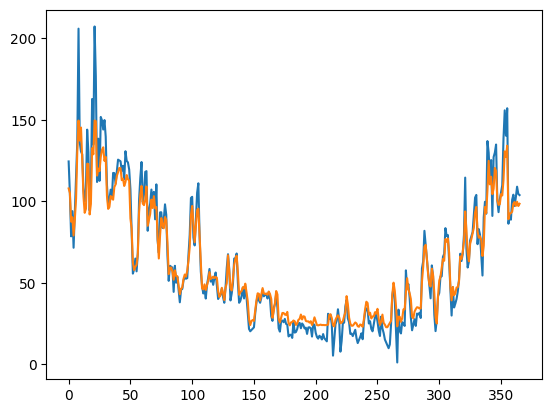

In [18]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9492290062116346


In [20]:
import joblib
joblib.dump(model, 'Tripura_PM25.pkl')

['Tripura_PM25.pkl']

In [21]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
pred_check2 = model.predict(X)

In [23]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9468457005977934


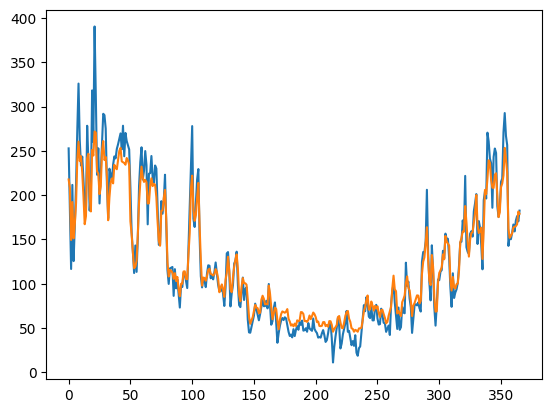

In [24]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [25]:
joblib.dump(model, 'Tripura_PM10.pkl')

['Tripura_PM10.pkl']